# Fraud Detection in Financial Transactions



## 1. Data Description

The dataset consists of financial transactions, each row representing a transaction with the following columns:



### Columns Information:
- **step**: Represents a unit of time where 1 step equals 1 hour.
- **type**: Type of transaction (e.g., `CASH_IN`, `CASH_OUT`, `DEBIT`, `PAYMENT`, `TRANSFER`).
- **amount**: The amount of money being transacted.
- **nameOrig**: Customer ID of the sender.
- **oldbalanceOrg**: Initial balance before the transaction for the sender.
- **newbalanceOrig**: Balance after the transaction for the sender.
- **nameDest**: Customer ID of the receiver.
- **oldbalanceDest**: Initial balance before the transaction for the receiver.
- **newbalanceDest**: Balance after the transaction for the receiver.
- **isFraud**: Binary flag indicating whether the transaction was fraudulent (`1` for fraud, `0` for non-fraud).
- **isFlaggedFraud**: Binary flag indicating whether the transaction was flagged as potentially fraudulent by internal monitoring systems (`1` if flagged, `0` otherwise).



### Data Size:
- **Number of Rows**: 6,362,620 rows.
- **Number of Columns**: 10 columns.

---



## 2. Objective

The objective of this project is to develop a machine learning model that predicts fraudulent financial transactions. The key objectives are:
- To detect fraudulent transactions based on patterns in the data.
- To build a machine learning model to classify transactions as either fraudulent (`isFraud = 1`) or non-fraudulent (`isFraud = 0`).
- To evaluate the model and identify key factors that contribute to fraud detection.





## 3. Steps Involved

### Step 1: Data Cleaning
- **Handling Missing Data**: Identify and handle any missing values.
- **Outliers**: Detect and treat outliers in continuous variables like `amount`, `oldbalanceOrg`, and `newbalanceOrig`.
- **Multi-collinearity**: Check for multicollinearity among the features.

### Step 2: Feature Selection
- Evaluate and select the most relevant features for the fraud detection model.
- Consider correlation analysis and feature importance based on algorithms.

### Step 3: Model Development
- **Model Selection**: Use classification models such as Logistic Regression, Decision Trees, Random Forest, or Gradient Boosting.
- **Evaluation**: Evaluate models using performance metrics such as accuracy, precision, recall, F1-score, and AUC-ROC.
- **Cross-Validation**: Use cross-validation to prevent overfitting and ensure model robustness.

---


## 4. Key Questions

1. **Data Cleaning**: How were missing values, outliers, and multi-collinearity handled?
2. **Model Description**: What is the fraud detection model developed? Elaborate on its structure and rationale.
3. **Feature Selection**: What variables were selected and why?
4. **Model Performance**: How does the model perform? Show key metrics like accuracy, precision, and recall.
5. **Key Fraud Predictors**: What are the most significant features that predict fraud?
6. **Business Justification**: Do these factors make sense from a business perspective? Explain how or why not.
7. **Infrastructure Improvements**: What measures should the company implement to prevent fraud?
8. **Measuring Success**: How will the company determine if these measures are successful?


## Key Factors Predicting Fraud

Key factors include:

- **Transaction Amount**: Extremely high amounts could be indicators of fraud.
- **Balance Differences**: Unusual differences between old and new balances.
- **Transfer vs. Payment**: The type of transaction (e.g., TRANSFER, CASH_OUT) seems to have higher `isFraud` values.


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Loading Dataset

In [4]:
df = pd.read_csv("C:\\Users\\Khan Mokhit\\Downloads\\Fraud.csv")

In [5]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


### Data Exploration


In [5]:
# Check the shape of the DataFrame
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB
None


In [6]:
# Summary statistics
print(df.describe())

               step        amount  oldbalanceOrg  newbalanceOrig  \
count  6.362620e+06  6.362620e+06   6.362620e+06    6.362620e+06   
mean   2.433972e+02  1.798619e+05   8.338831e+05    8.551137e+05   
std    1.423320e+02  6.038582e+05   2.888243e+06    2.924049e+06   
min    1.000000e+00  0.000000e+00   0.000000e+00    0.000000e+00   
25%    1.560000e+02  1.338957e+04   0.000000e+00    0.000000e+00   
50%    2.390000e+02  7.487194e+04   1.420800e+04    0.000000e+00   
75%    3.350000e+02  2.087215e+05   1.073152e+05    1.442584e+05   
max    7.430000e+02  9.244552e+07   5.958504e+07    4.958504e+07   

       oldbalanceDest  newbalanceDest       isFraud  isFlaggedFraud  
count    6.362620e+06    6.362620e+06  6.362620e+06    6.362620e+06  
mean     1.100702e+06    1.224996e+06  1.290820e-03    2.514687e-06  
std      3.399180e+06    3.674129e+06  3.590480e-02    1.585775e-03  
min      0.000000e+00    0.000000e+00  0.000000e+00    0.000000e+00  
25%      0.000000e+00    0.000000e+00

In [7]:
# Check for missing values
print(df.isnull().sum())

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64


In [8]:

# Display the first few rows
print(df.head())

   step      type    amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0     1   PAYMENT   9839.64  C1231006815       170136.0       160296.36   
1     1   PAYMENT   1864.28  C1666544295        21249.0        19384.72   
2     1  TRANSFER    181.00  C1305486145          181.0            0.00   
3     1  CASH_OUT    181.00   C840083671          181.0            0.00   
4     1   PAYMENT  11668.14  C2048537720        41554.0        29885.86   

      nameDest  oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud  
0  M1979787155             0.0             0.0        0               0  
1  M2044282225             0.0             0.0        0               0  
2   C553264065             0.0             0.0        1               0  
3    C38997010         21182.0             0.0        1               0  
4  M1230701703             0.0             0.0        0               0  


# EDA

### Transaction types

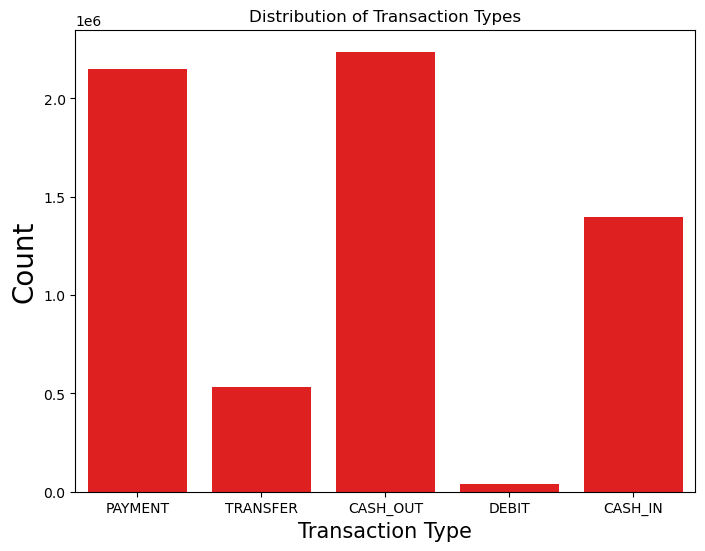

In [9]:
plt.figure(figsize=(8,6))
sns.countplot(data=df, x='type',color='r')
plt.title('Distribution of Transaction Types')
plt.xlabel('Transaction Type', size = 15)
plt.ylabel('Count' , size = 20)
plt.show()

### Fraud vs Non-Fraud Transactions

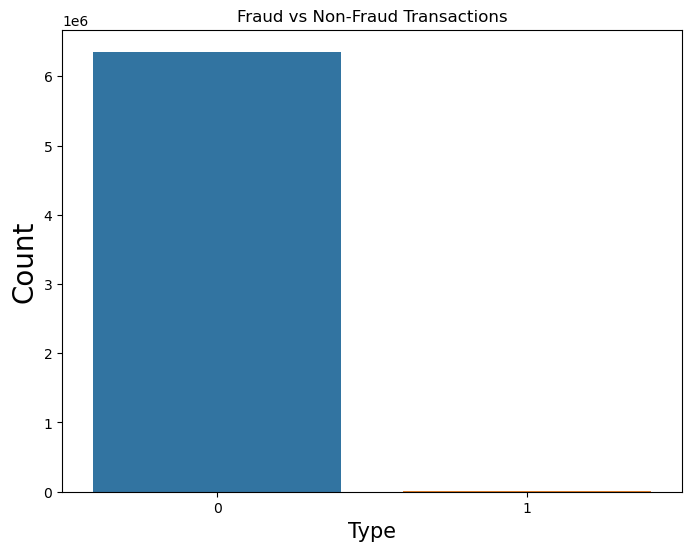

In [10]:
plt.figure(figsize=(8,6))
sns.countplot(data=df, x='isFraud')
plt.title('Fraud vs Non-Fraud Transactions')
plt.xlabel('Type', size = 15)
plt.ylabel('Count' , size = 20)
plt.show()

### Amount Distribution in Fraudulent vs Non-Fraudulent Transactions


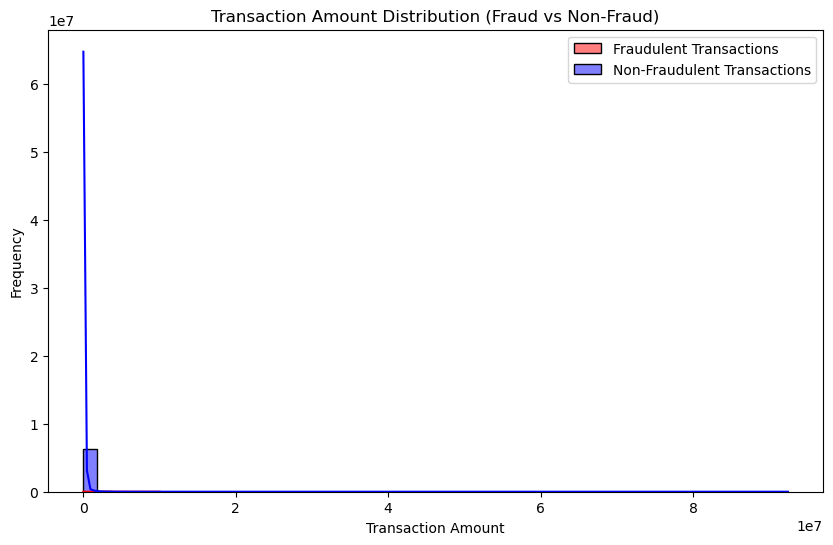

In [11]:
plt.figure(figsize=(10,6))
sns.histplot(df[df['isFraud'] == 1]['amount'], color='red', bins=50, label='Fraudulent Transactions', kde=True)
sns.histplot(df[df['isFraud'] == 0]['amount'], color='blue', bins=50, label='Non-Fraudulent Transactions', kde=True)
plt.legend()
plt.title('Transaction Amount Distribution (Fraud vs Non-Fraud)')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.show()

### Sender and Receiver Balances Before and After Transaction

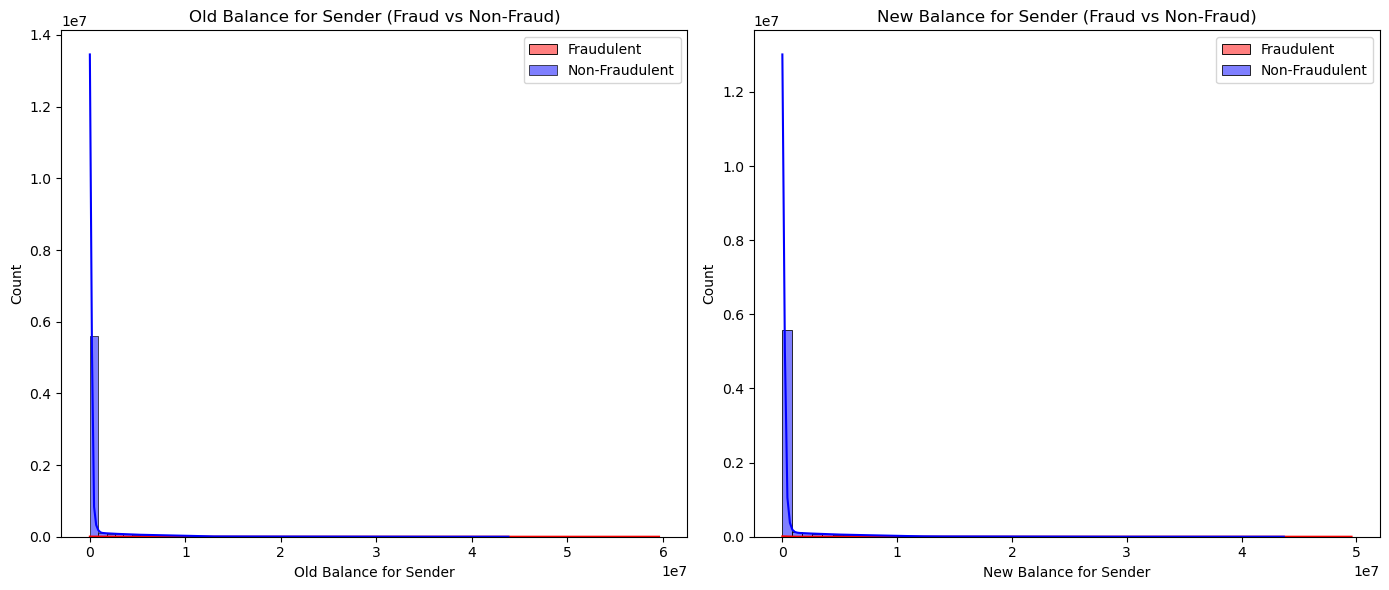

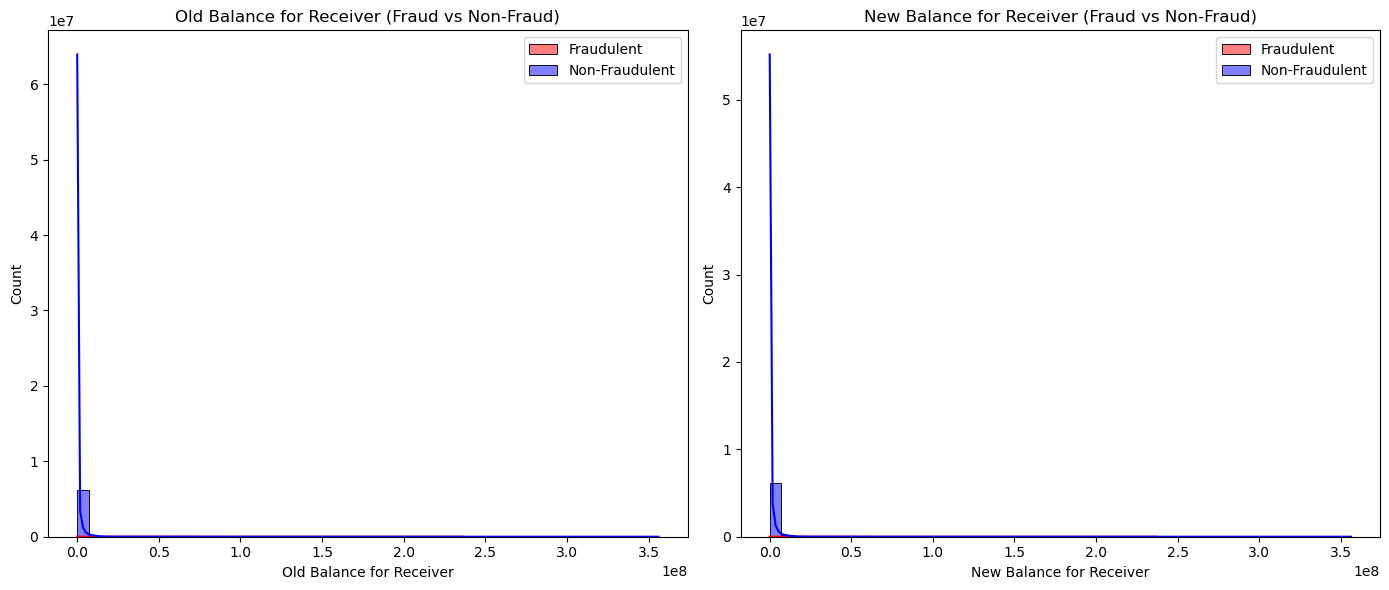

In [13]:
plt.figure(figsize=(14,6))

# Old balance for sender
plt.subplot(1,2,1)
sns.histplot(df[df['isFraud'] == 1]['oldbalanceOrg'], color='red', bins=50, kde=True, label='Fraudulent')
sns.histplot(df[df['isFraud'] == 0]['oldbalanceOrg'], color='blue', bins=50, kde=True, label='Non-Fraudulent')
plt.title('Old Balance for Sender (Fraud vs Non-Fraud)')
plt.xlabel('Old Balance for Sender')
plt.legend()

# New balance for sender
plt.subplot(1,2,2)
sns.histplot(df[df['isFraud'] == 1]['newbalanceOrig'], color='red', bins=50, kde=True, label='Fraudulent')
sns.histplot(df[df['isFraud'] == 0]['newbalanceOrig'], color='blue', bins=50, kde=True, label='Non-Fraudulent')
plt.title('New Balance for Sender (Fraud vs Non-Fraud)')
plt.xlabel('New Balance for Sender')
plt.legend()

plt.tight_layout()
plt.show()

# Comparison of old and new balances for receiver (Dest)
plt.figure(figsize=(14,6))

# Old balance for receiver
plt.subplot(1,2,1)
sns.histplot(df[df['isFraud'] == 1]['oldbalanceDest'], color='red', bins=50, kde=True, label='Fraudulent')
sns.histplot(df[df['isFraud'] == 0]['oldbalanceDest'], color='blue', bins=50, kde=True, label='Non-Fraudulent')
plt.title('Old Balance for Receiver (Fraud vs Non-Fraud)')
plt.xlabel('Old Balance for Receiver')
plt.legend()

# New balance for receiver
plt.subplot(1,2,2)
sns.histplot(df[df['isFraud'] == 1]['newbalanceDest'], color='red', bins=50, kde=True, label='Fraudulent')
sns.histplot(df[df['isFraud'] == 0]['newbalanceDest'], color='blue', bins=50, kde=True, label='Non-Fraudulent')
plt.title('New Balance for Receiver (Fraud vs Non-Fraud)')
plt.xlabel('New Balance for Receiver')
plt.legend()

plt.tight_layout()
plt.show()


### Fraud by Transaction Type

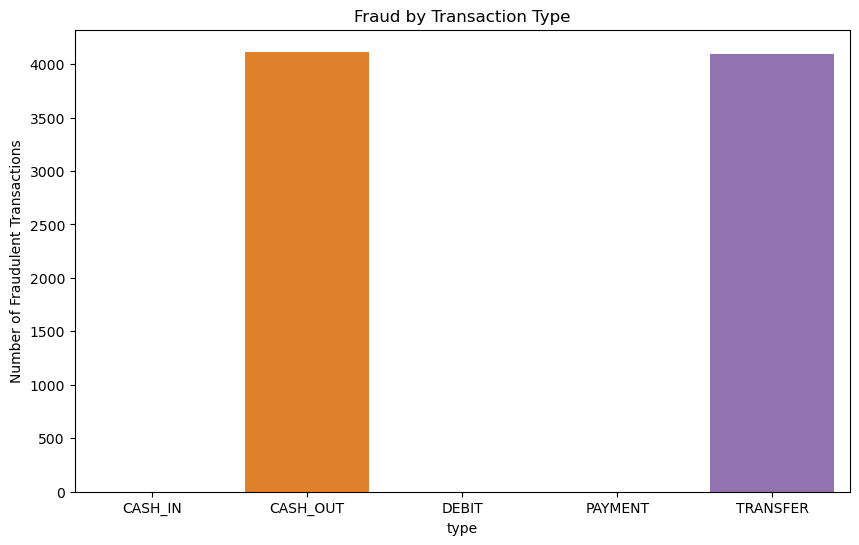

In [15]:
plt.figure(figsize=(10,6))
fraud_by_type = df.groupby('type')['isFraud'].sum()
sns.barplot(x=fraud_by_type.index, y=fraud_by_type.values)
plt.title('Fraud by Transaction Type')
plt.ylabel('Number of Fraudulent Transactions')
plt.show()


## Summary of Insights from EDA

1. **Transaction Types**:
   - The most common transaction types and how often each type occurs.

2. **Fraud Distribution**:
   - Insight into the balance between fraudulent and non-fraudulent transactions.
   - We might observe a class imbalance, with non-fraudulent transactions dominating the dataset.

3. **Amount Distribution**:
   - Significant differences in transaction amounts between fraudulent and non-fraudulent transactions.

4. **Balance Changes**:
   - Notable patterns in the sender’s and receiver’s old and new balances before and after the transactions.

5. **Fraud by Transaction Type**:
   - Certain types of transactions (e.g., TRANSFER and CASH_OUT) might have a higher rate of fraud.


# Data Preprocessing

### Null Values

In [16]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

### Outlier

In [6]:
Q1 = df['amount'].quantile(0.25)
Q3 = df['amount'].quantile(0.75)
IQR = Q3 - Q1
outliers = df[(df['amount'] < (Q1 - 1.5 * IQR)) | (df['amount'] > (Q3 + 1.5 * IQR))]
print(outliers)

         step      type      amount     nameOrig  oldbalanceOrg  \
85          1  TRANSFER  1505626.01   C926859124           0.00   
86          1  TRANSFER   554026.99  C1603696865           0.00   
88          1  TRANSFER   761507.39   C412788346           0.00   
89          1  TRANSFER  1429051.47  C1520267010           0.00   
93          1  TRANSFER   583848.46  C1839168128           0.00   
...       ...       ...         ...          ...            ...   
6362613   743  CASH_OUT  1258818.82  C1436118706     1258818.82   
6362616   743  TRANSFER  6311409.28  C1529008245     6311409.28   
6362617   743  CASH_OUT  6311409.28  C1162922333     6311409.28   
6362618   743  TRANSFER   850002.52  C1685995037      850002.52   
6362619   743  CASH_OUT   850002.52  C1280323807      850002.52   

         newbalanceOrig     nameDest  oldbalanceDest  newbalanceDest  isFraud  \
85                  0.0   C665576141        29031.00      5515763.34        0   
86                  0.0   C766572

# Model training using - Random forest classifier

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [8]:
X = df[['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']]
y = df['isFraud']

In [9]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
# Train the model
model = RandomForestClassifier()
model.fit(X_train, y_train)

### Variable Selection

In [ ]:
importances = model.feature_importances_

### Model Performance

In [ ]:
from sklearn.metrics import classification_report, roc_auc_score

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

# ROC-AUC score
y_prob = model.predict_proba(X_test)[:, 1]
print(roc_auc_score(y_test, y_prob))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906351
           1       0.93      0.72      0.81      2435

    accuracy                           1.00   1908786
   macro avg       0.96      0.86      0.91   1908786
weighted avg       1.00      1.00      1.00   1908786

0.9876120748643741


## 5. Conclusion

Based on the transaction data, a machine learning model will be developed to predict fraudulent transactions. The model’s accuracy, precision, and recall will help determine its effectiveness. The project will also offer insights into the key factors that contribute to fraudulent behavior, allowing the company to implement preventive measures in its financial infrastructure.